In [223]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
# Read data
df = pd.read_csv("../../BID.csv")
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df.head()

,Price
0,20664.3
1,20511.2
2,21085.2
3,20970.4
4,21314.8


In [225]:

# Split the data into training, testing sets by 7:3
length = len(df)
train_size = int(0.7 * length)
test_size =length - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [226]:
from statsmodels.tsa.stattools import adfuller
adf1= adfuller(train_data["Price"])
print ("%f"%adf1[1])

0.287698


In [227]:
from statsmodels.tsa.stattools import adfuller
adf1= adfuller(np.diff(train_data["Price"]))
print ("%f"%adf1[1])

0.000000


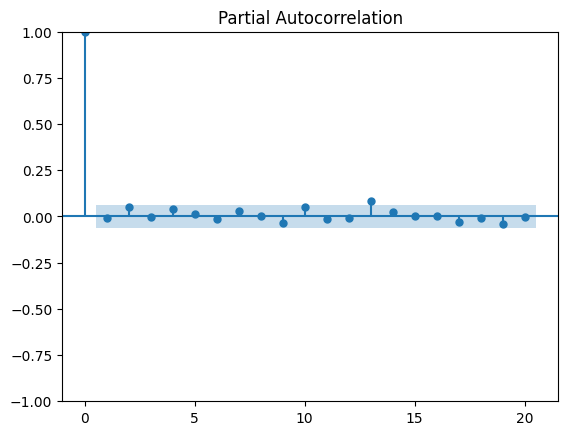

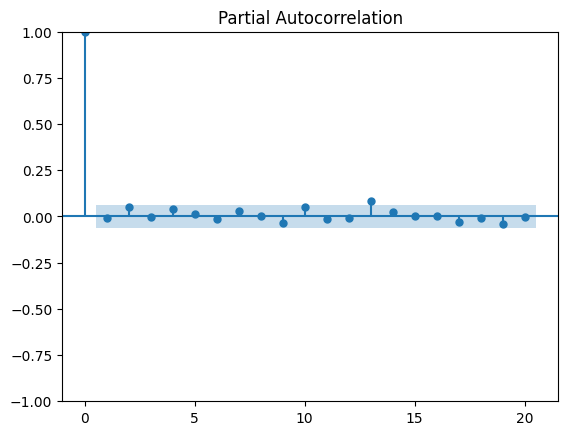

In [228]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(np.diff(train_data['Price']), lags =20)

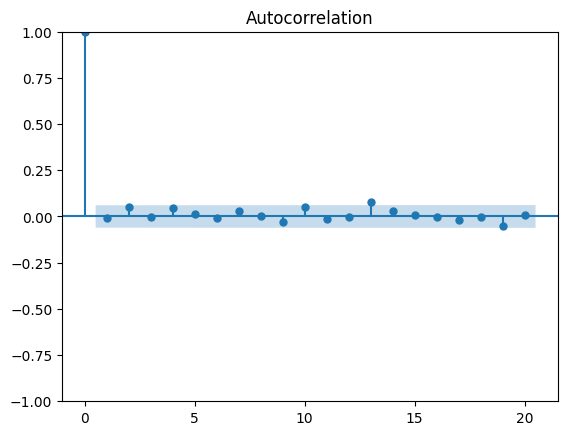

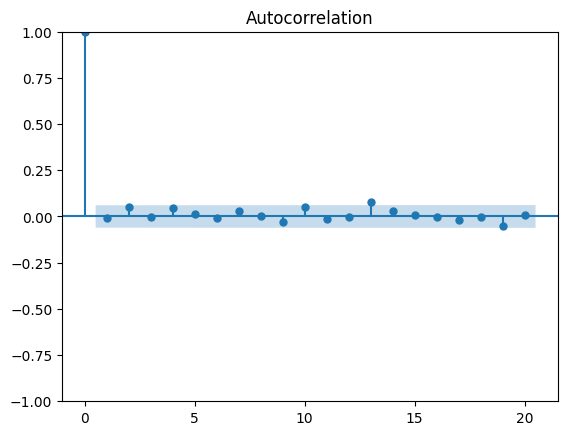

In [229]:
plot_acf(np.diff(train_data['Price']), lags =20)


#### MODEL 1


In [230]:
#3. Set up training process 
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train_data["Price"], order= (2,1,2)).fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1044
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8362.772
Date:                Tue, 02 Jan 2024   AIC                          16735.544
Time:                        10:43:29   BIC                          16760.293
Sample:                             0   HQIC                         16744.931
                               - 1044                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1844      0.274      0.674      0.500      -0.352       0.721
ar.L2          0.6266      0.293      2.139      0.032       0.052       1.201
ma.L1         -0.1950      0.283     -0.688      0.4

In [231]:
# 4.make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
forecast = model1.forecast(steps=len(y_test))
y_pred =np.array(forecast)

In [232]:
# 5.Caculate the  some metrics
# calculate the RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# calculate the MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# calculate the MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 4822.572374681672
Testing MAPE: 10.493077426363435
Testing MAE: 4003.069620671892


In [233]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model1.forecast(steps=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(np.array(y_next_30_days))

Predicted closing prices for the next 30 days:
[41812.03459038 41791.81075776 41764.29140037 41746.54349412
 41726.02635143 41711.12132605 41695.51614446 41683.29842187
 41671.26673996 41661.39197573 41652.03159536 41644.11762464
 41636.7927379  41630.48282878 41624.72924041 41619.71424868
 41615.18407392 41611.20612582 41607.63381692 41604.48235083
 41601.66267893 41599.16790427 41596.94095634 41594.96698771
 41593.20749921 41591.64608679 41590.25560112 41589.02075604
 41587.92172032 41586.94525797]


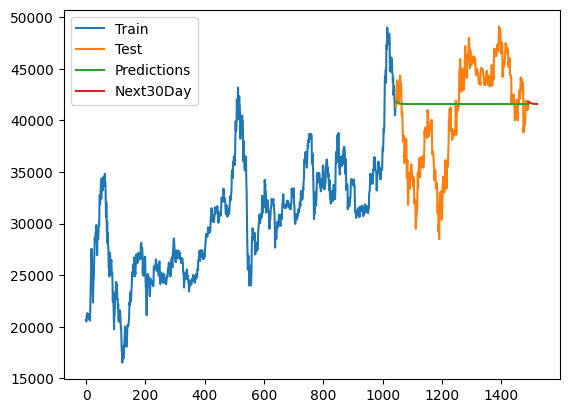

In [234]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

### MODEL 2


In [235]:
#3. Set up training process 
model2 = ARIMA(train_data["Price"], order= (13,1,13)).fit()
print(model2.summary())

c:\Users\thien\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1044
Model:               ARIMA(13, 1, 13)   Log Likelihood               -8352.171
Date:                Tue, 02 Jan 2024   AIC                          16758.342
Time:                        10:43:39   BIC                          16891.988
Sample:                             0   HQIC                         16809.033
                               - 1044                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0617      0.644      0.096      0.924      -1.200       1.323
ar.L2         -0.1423      0.669     -0.213      0.831      -1.453       1.168
ar.L3          0.0050      0.617      0.008      0.9

In [236]:
# 4.make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
forecast = model2.forecast(steps=len(y_test))
y_pred =np.array(forecast)

In [237]:
# 5.Caculate the  some metrics
# calculate the RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# calculate the MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# calculate the MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 4772.822259797703
Testing MAPE: 10.4339091257584
Testing MAE: 4022.5602119087193


In [238]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model2.forecast(steps=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(np.array(y_next_30_days))

Predicted closing prices for the next 30 days:
[41571.74309503 41586.16677566 41495.92374655 41440.30545218
 41612.50952429 41375.18106696 41564.74289006 41524.86912851
 41345.44039801 41467.95917993 41237.47349769 41375.25726788
 41413.63563464 41302.24259263 41468.992732   41261.33625069
 41306.61235844 41306.07239157 41182.50685404 41400.49736464
 41262.06325768 41287.10447335 41305.55520916 41135.47084654
 41285.48669973 41185.1726936  41252.60097538 41338.11194596
 41169.71777237 41279.276848  ]


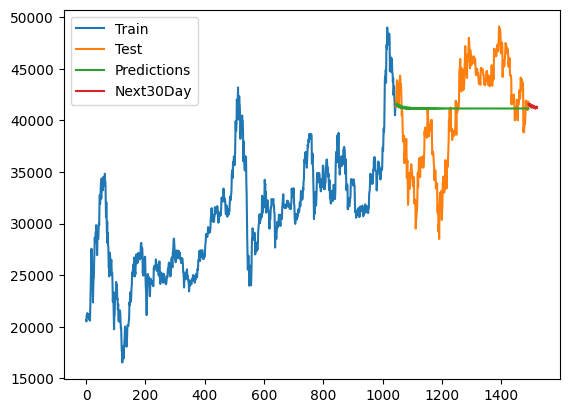

In [239]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

### MODEL 3
 

In [240]:
#3. Set up training process 
model3 = ARIMA(train_data["Price"], order= (2,1,4)).fit()
print(model3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1044
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -8360.883
Date:                Tue, 02 Jan 2024   AIC                          16735.766
Time:                        10:43:41   BIC                          16770.415
Sample:                             0   HQIC                         16748.908
                               - 1044                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9905      0.124     -8.019      0.000      -1.233      -0.748
ar.L2         -0.8238      0.102     -8.043      0.000      -1.025      -0.623
ma.L1          0.9866      0.127      7.766      0.0

In [241]:
# 4.make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
forecast = model3.forecast(steps=len(y_test))
y_pred =np.array(forecast)

In [242]:
# 5.Caculate the  some metrics
# calculate the RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# calculate the MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# calculate the MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 4885.683435566051
Testing MAPE: 10.585782807376045
Testing MAE: 4007.990111983982


In [243]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model3.forecast(steps=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(np.array(y_next_30_days))

Predicted closing prices for the next 30 days:
[41834.61544692 41921.38426827 41885.63145998 41900.14148894
 41915.22384742 41888.33158867 41902.54221077 41910.62158547
 41890.91219412 41903.77766704 41907.27194417 41893.21209698
 41904.25921007 41904.90027698 41895.16444295 41904.27931713
 41903.27197165 41896.76065734 41904.03976045 41902.19424396
 41898.02546126 41903.67487494 41901.51367404 41899.00014332
 41903.2701567  41901.11156646 41899.73183342 41902.87670942
 41900.89847808 41900.26702138]


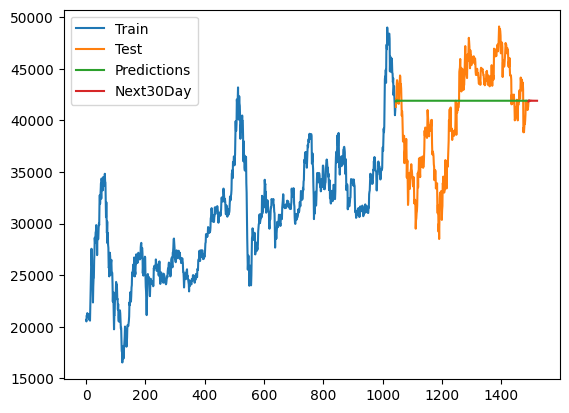

In [244]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

### Auto model 


In [245]:
#3. Set up training process 
from pmdarima.arima import auto_arima 
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16738.049, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16734.200, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16736.129, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16736.140, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16732.995, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16736.462, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.419 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [246]:
#4.make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))
y_pred

array([41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
       41850., 41850., 41850., 41850., 41850., 41850., 41850., 41850.,
      

In [247]:
# 5.Caculate the  some metrics
# calculate the RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# calculate the MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# calculate the MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 4874.4087324588845
Testing MAPE: 10.570017640727345
Testing MAE: 4006.808035714286


In [248]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(np.array(y_next_30_days))

Predicted closing prices for the next 30 days:
[41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850.
 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850.
 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850. 41850.]


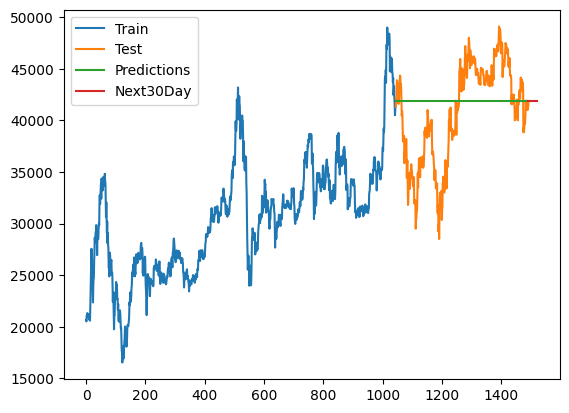

In [249]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()